In [1]:
import pandas as pd
import numpy as np
import glob 
from os.path import join
import ntpath
import os
from collections import defaultdict
import math
import matplotlib.pyplot as plt

from matplotlib import rcParams
%matplotlib inline

In [2]:
def get_sampling_dirs(root,mode='train'):
    if mode=='train':
        folder = '*/PCAP-01-12_l'
    elif mode=='test':
        folder = '*/PCAP-03-11_l'
        
    dirs = [d for d in glob.glob(join(root,folder))]
    return sorted(dirs)

In [3]:
def get_sampling_time(d):
    with open(join(d,'sampling_time.txt')) as f:
        delta = int(f.readline())
    
    return delta

In [4]:
def extract_sampler_names(dir_names):
    sampler_names = []
    for dir_name in dir_names:
        if 'SFS' in dir_name:
            label = 'SketchFlow Sampling'
        elif 'SGS' in dir_name:
            label = 'Sketch Guided Sampling'
        elif 'RPS' in dir_name:
            label = 'Random Packet Sampling'
        elif 'FFS' in dir_name:
            label = 'Fast Filtered Sampling'
        elif 'SEL' in dir_name:
            label = 'Selective Flow Sampling'
        elif 'without_sampling_l' in dir_name:
            label = 'Without Sampling'
        else:
            print('Investigate plot_comparison',dir_name)
            
        sampler_names.append(label)
    return sampler_names

In [9]:
roots = ['/data/juma/data/ddos/CSVs_r_1.0/SR_10/',
         '/data/juma/data/ddos/CSVs_r_0.1/SR_10/',
         '/data/juma/data/ddos/CSVs_r_0.01/SR_10/',
        '/data/juma/data/ddos/CSVs_r_0.001/SR_10/',
        '/data/juma/data/ddos/CSVs_r_0.0001/SR_10/',
        '/data/juma/data/ddos/CSVs_r_1e-05/SR_10/'
        ]

classifier_fingerprint = 'r_1_c_cnn_k_5_optim_Adam_lr_0.001_reg_0_bs_256_b_explicit'
#classifier_fingerprint = 'r_1_c_forest_k_5_b_explicit_n_10_bootstrap_True_mf_auto'
sampling_times_d = defaultdict(list)
sampler_names = None
for root in roots:
    print(ntpath.split(root)[0])
    sampling_dirs = get_sampling_dirs(root,mode='test')
    print(sampling_dirs)
    
    sampler_names = extract_sampler_names(sampling_dirs)   
    sampling_times = [get_sampling_time(d) for d in sampling_dirs]
    print(sampling_times)
    
    
    for i,name in enumerate(sampler_names): 
        sampling_times_d[name].append(sampling_times[i])


/data/juma/data/ddos/CSVs_r_1.0/SR_10
['/data/juma/data/ddos/CSVs_r_1.0/SR_10/FFS_(8,16,4)/PCAP-03-11_l', '/data/juma/data/ddos/CSVs_r_1.0/SR_10/RPS_SI_10/PCAP-03-11_l', '/data/juma/data/ddos/CSVs_r_1.0/SR_10/SEL_(230,1,1)/PCAP-03-11_l', '/data/juma/data/ddos/CSVs_r_1.0/SR_10/SFS_SI_9.77/PCAP-03-11_l', '/data/juma/data/ddos/CSVs_r_1.0/SR_10/SGS_e_0.0028/PCAP-03-11_l']
[1009, 877, 874, 987, 950]
/data/juma/data/ddos/CSVs_r_0.1/SR_10
['/data/juma/data/ddos/CSVs_r_0.1/SR_10/FFS_(8,16,4)/PCAP-03-11_l', '/data/juma/data/ddos/CSVs_r_0.1/SR_10/RPS_SI_10/PCAP-03-11_l', '/data/juma/data/ddos/CSVs_r_0.1/SR_10/SEL_(230,1,1)/PCAP-03-11_l', '/data/juma/data/ddos/CSVs_r_0.1/SR_10/SFS_SI_9.77/PCAP-03-11_l', '/data/juma/data/ddos/CSVs_r_0.1/SR_10/SGS_e_0.0028/PCAP-03-11_l']
[1098, 931, 830, 1018, 842]
/data/juma/data/ddos/CSVs_r_0.01/SR_10
['/data/juma/data/ddos/CSVs_r_0.01/SR_10/FFS_(8,16,4)/PCAP-03-11_l', '/data/juma/data/ddos/CSVs_r_0.01/SR_10/RPS_SI_10/PCAP-03-11_l', '/data/juma/data/ddos/CSVs_r_0

Fast Filtered Sampling [1009, 1098, 760, 743, 768, 724]
Random Packet Sampling [877, 931, 643, 622, 613, 648]
Selective Flow Sampling [874, 830, 684, 725, 726, 692]
SketchFlow Sampling [987, 1018, 727, 750, 702, 706]
Sketch Guided Sampling [950, 842, 726, 730, 712, 662]


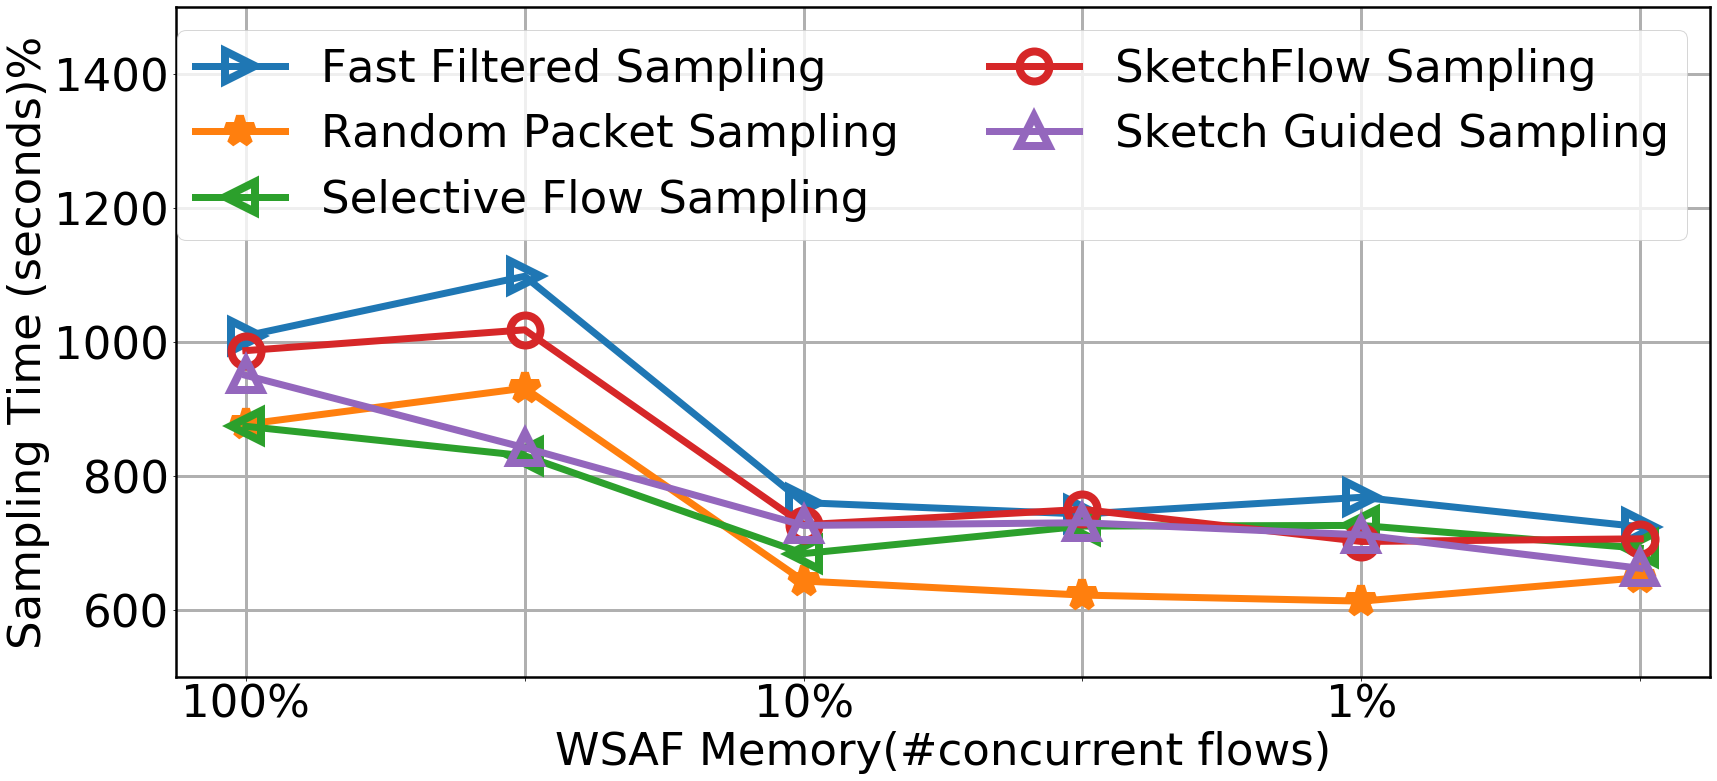

In [13]:
#drawing
font = {'size'   : 45}
plt.rc('font', **font)
plt.rcParams["axes.linewidth"]  = 2.5
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(25,12))
markers = ['>','*','<','o','^']
for i,name in enumerate(sampler_names):
    print(sampler_names[i],sampling_times_d[name])
    ax.plot(np.arange(len(roots)),sampling_times_d[name],label=sampler_names[i],linewidth=7,marker=markers[i],markersize=30,markeredgewidth=8,markerfacecolor='none')

plt.grid(linewidth=3)

plt.ylabel('Sampling Time (seconds)%')
plt.xlabel('WSAF Memory(#concurrent flows)')
ax.set_xticklabels(['','100%','','10%','','1%','','0.1%','','0.01%'])
ax.set_ylim(500,1500)
fig.tight_layout()
plt.legend(ncol=2)
plt.savefig('/data/juma/data/ddos/memory_effect_sampling_time.png', bbox_inches='tight',dpi=200)
plt.show()